# Project 3 part 2
Work flow: Features selection by tree model, *Random Forest*, *XGBoost*, *GAN* (for **Data Augmentation**)

Author: HUANG WENJIN

## Data Loading and Exploratory Analysis

In [1]:
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix,log_loss,classification_report,roc_curve,roc_auc_score
from sklearn.preprocessing import StandardScaler

In [2]:
# Load all the data

train = pd.read_csv("./data/application_train.csv")
test = pd.read_csv("./data/application_test.csv")
bureau = pd.read_csv("./data/bureau.csv")

In [3]:
train.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0


In [4]:
train.isnull().sum()

SK_ID_CURR                        0
TARGET                            0
NAME_CONTRACT_TYPE                0
CODE_GENDER                       0
FLAG_OWN_CAR                      0
                              ...  
AMT_REQ_CREDIT_BUREAU_DAY     41519
AMT_REQ_CREDIT_BUREAU_WEEK    41519
AMT_REQ_CREDIT_BUREAU_MON     41519
AMT_REQ_CREDIT_BUREAU_QRT     41519
AMT_REQ_CREDIT_BUREAU_YEAR    41519
Length: 122, dtype: int64

In [5]:
train.dtypes

SK_ID_CURR                      int64
TARGET                          int64
NAME_CONTRACT_TYPE             object
CODE_GENDER                    object
FLAG_OWN_CAR                   object
                               ...   
AMT_REQ_CREDIT_BUREAU_DAY     float64
AMT_REQ_CREDIT_BUREAU_WEEK    float64
AMT_REQ_CREDIT_BUREAU_MON     float64
AMT_REQ_CREDIT_BUREAU_QRT     float64
AMT_REQ_CREDIT_BUREAU_YEAR    float64
Length: 122, dtype: object

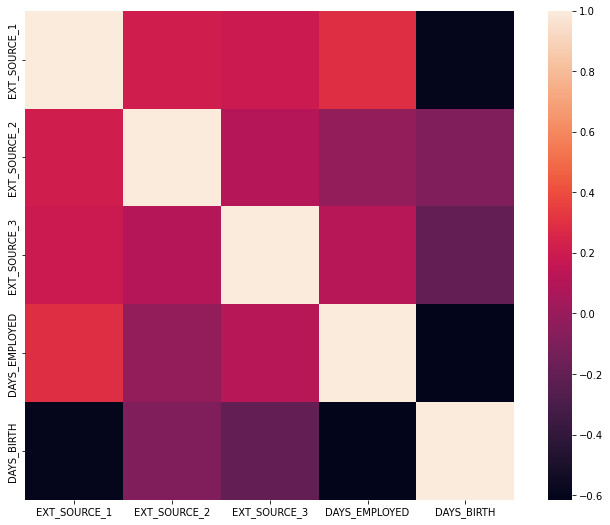

In [6]:
corrmat = train[['EXT_SOURCE_1','EXT_SOURCE_2','EXT_SOURCE_3','DAYS_EMPLOYED','DAYS_BIRTH']].corr()
fig = plt.figure(figsize = (12, 9))

sns.heatmap(corrmat, square = True)
plt.show()

Text(0, 0.5, 'Frequency')

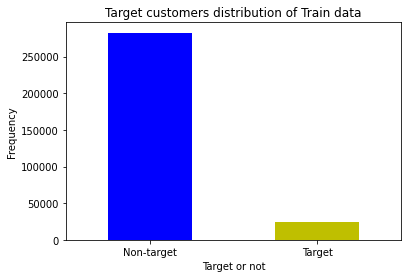

In [7]:
LABELS = ["Non-target", "Target"]
count_classes = pd.value_counts(train['TARGET'], sort = True)
count_classes.plot(kind = 'bar', rot=0, color=['b','y'])
plt.title("Target customers distribution of Train data")
plt.xticks(range(2), LABELS)
plt.xlabel("Target or not")
plt.ylabel("Frequency")

In [8]:
count_classes

0    282686
1     24825
Name: TARGET, dtype: int64

For each vital feature, we need to check out its distribution and decide if we perform **log transform** on the feature, to **standalize** our features. 

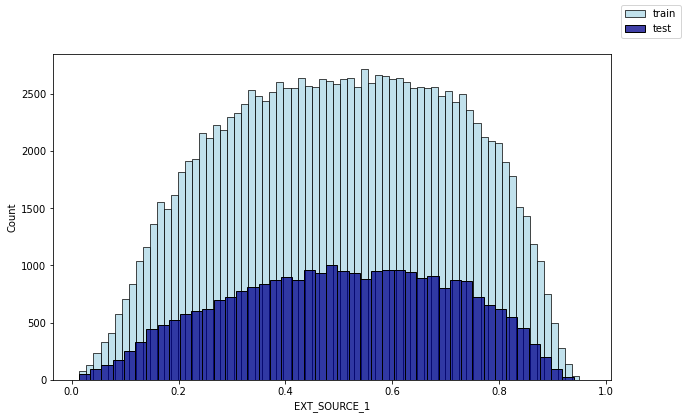

In [9]:
# distribution of EXT_SOURCE_1
fig = plt.figure(figsize=(10,6))
sns.histplot(train['EXT_SOURCE_1'],color='lightblue')
sns.histplot(test['EXT_SOURCE_1'],color='darkblue')
fig.legend(labels=['train','test'])
plt.savefig('./figure/feature1.png')

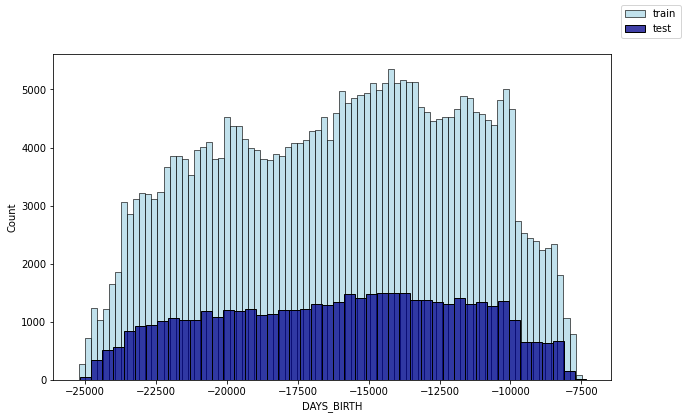

In [10]:
# distribution of DAYS_BIRTH
fig = plt.figure(figsize=(10,6))
sns.histplot(train['DAYS_BIRTH'],color='lightblue')
sns.histplot(test['DAYS_BIRTH'],color='darkblue')
fig.legend(labels=['train','test'])
plt.savefig('./figure/feature2.png')

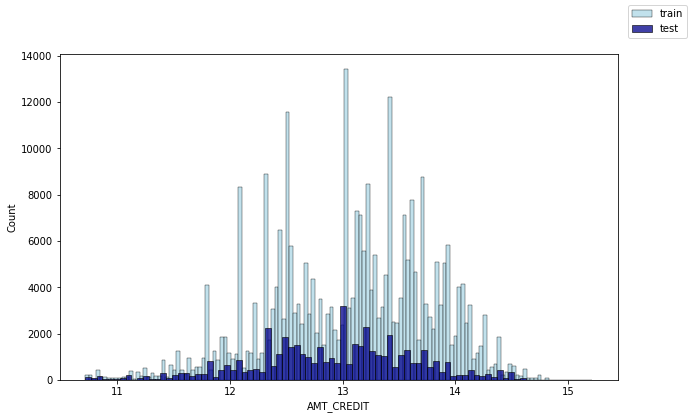

In [11]:
# distribution of AMT_CREIDT
train['AMT_CREDIT'] = train['AMT_CREDIT'].apply(np.log)
test['AMT_CREDIT'] = test['AMT_CREDIT'].apply(np.log)

fig = plt.figure(figsize=(10,6))
sns.histplot(train['AMT_CREDIT'],color='lightblue')
sns.histplot(test['AMT_CREDIT'],color='darkblue')
fig.legend(labels=['train','test'])
plt.savefig('./figure/feature3.png')

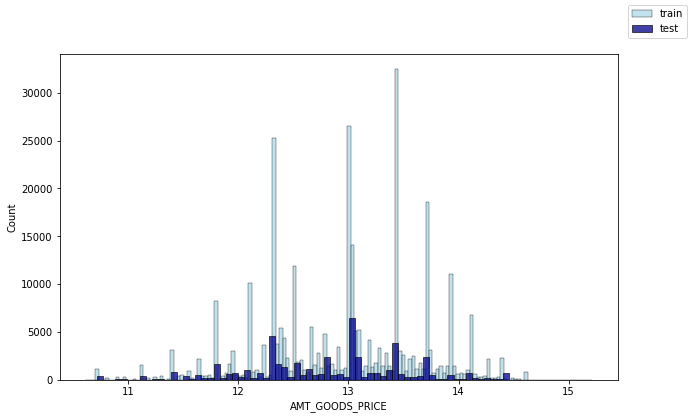

In [12]:
# distribution of AMT_GOODS_PRICE
train['AMT_GOODS_PRICE'] = train['AMT_GOODS_PRICE'].apply(np.log)
test['AMT_GOODS_PRICE'] = test['AMT_GOODS_PRICE'].apply(np.log)

fig = plt.figure(figsize=(10,6))
sns.histplot(train['AMT_GOODS_PRICE'],color='lightblue')
sns.histplot(test['AMT_GOODS_PRICE'],color='darkblue')
fig.legend(labels=['train','test'])
plt.savefig('./figure/feature4.png')

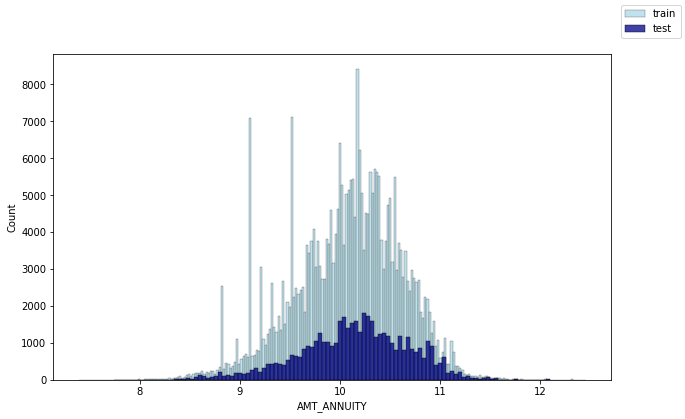

In [13]:
# distribution of AMT_ANNUITY
train['AMT_ANNUITY'] = train['AMT_ANNUITY'].apply(np.log)
test['AMT_ANNUITY'] = test['AMT_ANNUITY'].apply(np.log)

fig = plt.figure(figsize=(10,6))
sns.histplot(train['AMT_ANNUITY'],color='lightblue')
sns.histplot(test['AMT_ANNUITY'],color='darkblue')
fig.legend(labels=['train','test'])
plt.savefig('./figure/feature5.png')

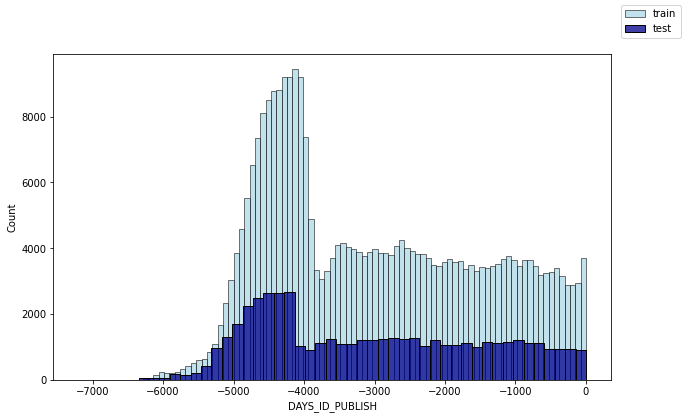

In [14]:
# distribution of DAYS_ID_PUBLISH
fig = plt.figure(figsize=(10,6))
sns.histplot(train['DAYS_ID_PUBLISH'],color='lightblue')
sns.histplot(test['DAYS_ID_PUBLISH'],color='darkblue')
fig.legend(labels=['train','test'])
plt.savefig('./figure/feature6.png')

## Feature engineering

In [15]:
CREDIT_ACTIVE_count = pd.get_dummies(bureau[['SK_ID_CURR','CREDIT_ACTIVE']]).groupby('SK_ID_CURR').sum()
(CREDIT_ACTIVE_count)

,CREDIT_ACTIVE_Active,CREDIT_ACTIVE_Bad debt,CREDIT_ACTIVE_Closed,CREDIT_ACTIVE_Sold
SK_ID_CURR,,,,
100001,3,0,4,0
100002,2,0,6,0
100003,1,0,3,0
100004,0,0,2,0
100005,2,0,1,0
...,...,...,...,...
456249,2,0,11,0
456250,2,0,1,0
456253,2,0,2,0


**Features engineering:** Choose features to learn by backward and distingushed with whether it numerical or not. And we have two way to select variabels, respectively **forward** and **backward**. Here we choose the forward one.

In [16]:
# Forward method to select features
## 标称型特征
# nominal_features = ['NAME_EDUCATION_TYPE']
## 数值型特征
# numerical_feature = ['EXT_SOURCE_1','EXT_SOURCE_2','EXT_SOURCE_3','DAYS_EMPLOYED','DAYS_BIRTH']

In [17]:
# Backward method to select features
## 标称型特征
nominal_features = list(train.select_dtypes(include=['object']))
## 数值型特征
numerical_feature = list(train.select_dtypes(include = ['int','float']))
## 剔除特征
del_list = ['TARGET']
for del_feat in del_list:
    numerical_feature.remove(del_feat)

In [18]:
nominal_X = train[nominal_features].fillna(method='ffill').fillna(method='bfill')
numerical_X = train[numerical_feature].fillna(method='ffill').fillna(method='bfill')
y = train["TARGET"]

In [19]:
# One-hot Encoding
from sklearn import preprocessing
encoder = preprocessing.OneHotEncoder()
encoder.fit(nominal_X)
encoded_X = encoder.transform(nominal_X).toarray()

# Create a new dataframe, data is one-hot array
encoded_X = pd.DataFrame(encoded_X)

# Give the new df column names
encoded_X.columns = list(encoder.get_feature_names())

# Concat each of df 
X = pd.concat([encoded_X, numerical_X], axis=1)

D:\Python\anaconda\envs\tf2.0\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


In [20]:
X['ANNUITY_CREDIT_ratio'] = X['AMT_ANNUITY']/X['AMT_CREDIT']

Now, **merge** all the additional features out of application data

In [21]:
X = pd.merge(X, CREDIT_ACTIVE_count, how='left', on='SK_ID_CURR')
X = X.fillna(method='ffill').fillna(method='bfill')

**Train-Test split:** combine both numerical and one-hot features together and split to try machine learning

In [22]:
xtrain,xtest,ytrain,ytest = train_test_split(X,y,test_size =.20,random_state=0)

## Random Forest

Set up **Random Forest** learner by *Sklearn*

In [21]:
from sklearn.ensemble import RandomForestClassifier

model = RandomForestClassifier(n_estimators=100, 
                               max_depth=5,
                               random_state=1, 
                               class_weight='balanced')

In [22]:
model.fit(xtrain,ytrain)
predict = model.predict(xtest)
predict[0:500]

array([1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0,
       1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1,
       0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 1,
       1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0,
       1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0,
       0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 1,
       0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0,
       0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0,
       1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1,
       1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0,

D:\Python\anaconda\envs\tf2.0\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


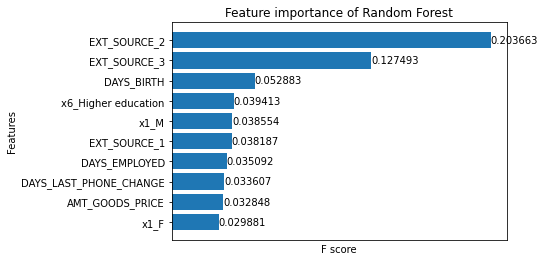

In [23]:

feature_labels = np.append(encoder.get_feature_names(), numerical_feature)
importances = model.feature_importances_
indices = np.argsort(importances)[::-1]

#绘图
fig, ax = plt.subplots()
b = ax.barh(range(10), importances[indices[:10]][::-1])
 
#为横向水平的柱图右侧添加数据标签
for rect in b:
    w = rect.get_width()
    ax.text(w, rect.get_y()+rect.get_height()/2, '%f' %
            w, ha='left', va='center')

ax.set_yticks(range(10))
ax.set_yticklabels(feature_labels[indices[:10]][::-1])
plt.xticks(()) 
plt.xlabel('F score') 
plt.ylabel('Features') 
plt.title('Feature importance of Random Forest')
plt.savefig('./figure/feature importance of Random Forest.png')
plt.show()


In [24]:
confusion_matrix(ytest,predict)

array([[37884, 18764],
       [ 1697,  3158]], dtype=int64)

In [25]:
print (classification_report(ytest, predict))

              precision    recall  f1-score   support

           0       0.96      0.67      0.79     56648
           1       0.14      0.65      0.24      4855

    accuracy                           0.67     61503
   macro avg       0.55      0.66      0.51     61503
weighted avg       0.89      0.67      0.74     61503



In [26]:
predict_proba=model.predict_proba(xtest)
log_loss(ytest,predict_proba) 

0.6468646368055875

0.7138638290396067


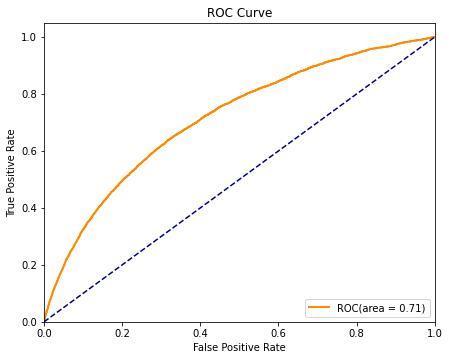

In [27]:
##计算auc
model_roc_auc = roc_auc_score(ytest, predict_proba[:,1])
print(model_roc_auc)

fpr, tpr, thresholds = roc_curve(ytest, predict_proba[:,1])
## 绘制roc曲线图
plt.subplots(figsize=(7,5.5));
plt.plot(fpr, tpr, color='darkorange',lw=2, label='ROC(area = %0.2f)' % model_roc_auc);
plt.plot([0, 1], [0, 1], color='navy',  linestyle='--');
plt.xlim([0.0, 1.0]);
plt.ylim([0.0, 1.05]);
plt.xlabel('False Positive Rate');
plt.ylabel('True Positive Rate');
plt.title('ROC Curve');
plt.legend(loc="lower right");
plt.show()

## XGB

In [23]:
import xgboost as xgb

In [24]:
reduced_feature = ['EXT_SOURCE_1','EXT_SOURCE_2','EXT_SOURCE_3','DAYS_BIRTH','DAYS_EMPLOYED','AMT_CREDIT',
                   'AMT_GOODS_PRICE','DAYS_ID_PUBLISH','AMT_ANNUITY','CREDIT_ACTIVE_Active']

In [25]:
dtrain = xgb.DMatrix(xtrain[reduced_feature], ytrain, feature_names=reduced_feature)
dtest = xgb.DMatrix(xtest[reduced_feature], ytest, feature_names=reduced_feature)


In [63]:
xgb_params = {
    'max_depth': 4,
    'objective': 'binary:logistic',
    'random_state': 1,
    'learning_rate' : 0.1,
    'eval_metric': 'auc', # auc, error
    'min_child_weight':4,
    'subsample':0.9,
    'colsample_bytree':0.8,
#     'nthread':4,
    'scale_pos_weight':10,
    'eta' : 0.5
}


In [27]:
xgb_cv = xgb.cv(xgb_params, dtrain, num_boost_round=200, 
                verbose_eval=False,
                early_stopping_rounds=10,
                nfold=5,
                show_stdv=True,
                metrics='auc', 
                maximize=True)
xgb_cv

,train-auc-mean,train-auc-std,test-auc-mean,test-auc-std
0,0.695178,0.000890,0.691711,0.005150
1,0.703530,0.002016,0.699663,0.005895
2,0.711811,0.003846,0.706196,0.006570
3,0.714958,0.003732,0.709141,0.006044
4,0.716615,0.002667,0.710605,0.005853
...,...,...,...,...
195,0.789271,0.001719,0.749990,0.004510
196,0.789384,0.001766,0.749984,0.004503
197,0.789593,0.001718,0.749954,0.004492
198,0.789722,0.001716,0.749940,0.004494


In [28]:
XGB = xgb.train(xgb_params,dtrain,num_boost_round=200)

In [29]:
predict_proba = XGB.predict(dtest)
predict = [round(value) for value in predict_proba]
print( 'best iteration: ', xgb_cv.shape[0] )

best iteration:  200


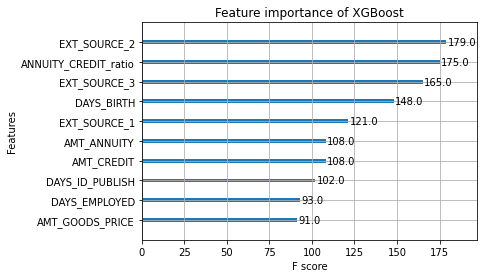

In [30]:
xgb.plot_importance(XGB,max_num_features=10, title='Feature importance of XGBoost')
plt.savefig('./figure/feature importance of XGBoost.png')
plt.show()

In [31]:
confusion_matrix(ytest,predict)

array([[42389, 14259],
       [ 1825,  3030]], dtype=int64)

In [32]:
print (classification_report(ytest, predict))

              precision    recall  f1-score   support

           0       0.96      0.75      0.84     56648
           1       0.18      0.62      0.27      4855

    accuracy                           0.74     61503
   macro avg       0.57      0.69      0.56     61503
weighted avg       0.90      0.74      0.80     61503



In [33]:
log_loss(ytest,predict_proba) 

0.5344930418007499

0.752365597817574


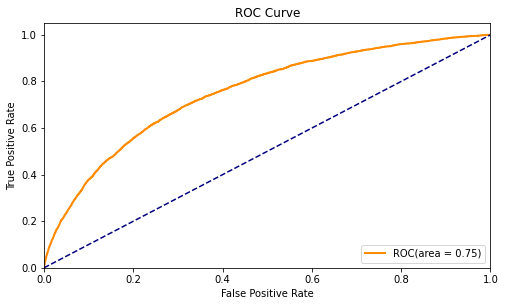

In [34]:
##计算auc
model_roc_auc = roc_auc_score(ytest, predict_proba)
print(model_roc_auc)

fpr, tpr, thresholds = roc_curve(ytest, predict_proba)
## 绘制roc曲线图
plt.subplots(figsize=(8,4.5));
plt.plot(fpr, tpr, color='darkorange',lw=2, label='ROC(area = %0.2f)' % model_roc_auc);
plt.plot([0, 1], [0, 1], color='navy',  linestyle='--');
plt.xlim([0.0, 1.0]);
plt.ylim([0.0, 1.05]);
plt.xlabel('False Positive Rate');
plt.ylabel('True Positive Rate');
plt.title('ROC Curve');
plt.legend(loc="lower right");
# plt.rcParams['savefig.dpi'] = 300 #图片像素
# plt.rcParams['figure.dpi'] = 400 #分辨率
plt.show()

In [35]:
import gc
del dtrain, dtest
gc.collect

<function gc.collect(generation=2)>

## GAN

As there are too many features highly **descreted**, we need to reduce the dimensions and standardize them when applying ***GAN***. Otherwise, it can hardly get well train among the messy data.

Here, for simplify the problem, we only use GAN to generate the $TARGET=1$ samples but not $TARGET=0$ ones, so we don't need to imply label information among GAN.

In [43]:
# Feature reduce
reduced_feature = ['EXT_SOURCE_1','EXT_SOURCE_2','EXT_SOURCE_3','DAYS_BIRTH','DAYS_EMPLOYED','AMT_CREDIT',
                   'AMT_GOODS_PRICE','DAYS_ID_PUBLISH','AMT_ANNUITY','CREDIT_ACTIVE_Active']
train = pd.concat([ytrain,xtrain], axis=1)
train = train[train['TARGET'] == 1]
train = train[reduced_feature].reset_index(drop=True)
train = (train-train.mean())/(train.std())

In [37]:

# Remark: Please put GAN_171103.py with the same dir of the code file during running
# reloading the libraries and setting the parameters


import GAN_171103
import importlib
importlib.reload(GAN_171103) # For reloading after making changes
from GAN_171103 import *

interation_steps = 5000
rand_dim = 32 # 32 # needs to be ~data_dim
base_n_count = 128 # 128

nb_steps = interation_steps + 1 # 50000 # Add one for logging of the last interval
batch_size = 128 # 64

k_d = 1  # number of critic network updates per adversarial training step
k_g = 1  # number of generator network updates per adversarial training step
critic_pre_train_steps = 100 # 100  # number of steps to pre-train the critic before starting adversarial training
log_interval = 100 # 100  # interval (in steps) at which to log loss summaries and save plots of image samples to disc
learning_rate = 5e-4 # 5e-5
data_dir = 'cache/'
generator_model_path, discriminator_model_path, loss_pickle_path = None, None, None

# show = False
show = True 

# train = create_toy_spiral_df(1000)
# train = create_toy_df(n=1000,n_dim=2,n_classes=4,seed=0)
# train = xtrain.copy().reset_index(drop=True) # fraud only with labels from classification

# train = pd.get_dummies(train, columns=['Class'], prefix='Class', drop_first=True)

label_cols = [ i for i in train.columns if 'TARGET' in i ]
data_cols = [ i for i in train.columns if i not in label_cols ]
train[ data_cols ] = train[ data_cols ] / 10 # scale to random noise size, one less thing to learn
train_no_label = train[ data_cols ]

Instructions for updating:
non-resource variables are not supported in the long term


data_dim:  10
data_cols:  ['EXT_SOURCE_1', 'EXT_SOURCE_2', 'EXT_SOURCE_3', 'DAYS_BIRTH', 'DAYS_EMPLOYED', 'AMT_CREDIT', 'AMT_GOODS_PRICE', 'DAYS_ID_PUBLISH', 'AMT_ANNUITY', 'CREDIT_ACTIVE_Active']
Instructions for updating:
If using Keras pass *_constraint arguments to layers.
Model: "generator"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 32)]              0         
_________________________________________________________________
dense (Dense)                (None, 128)               4224      
_________________________________________________________________
dense_1 (Dense)              (None, 256)               33024     
_________________________________________________________________
dense_2 (Dense)              (None, 512)               131584    
_________________________________________________________________
dense_3 (Dense)              (None, 10)    

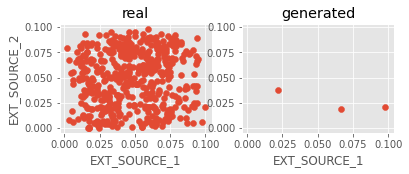

Step: 100 of 5001.
Losses: G, D Gen, D Real, Xgb: 0.6615, 0.7395, 0.6561, 0.9797
D Real - D Gen: -0.0834


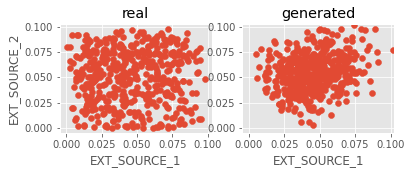

Step: 200 of 5001.
Losses: G, D Gen, D Real, Xgb: 0.6964, 0.7086, 0.6727, 0.9675
D Real - D Gen: -0.0359


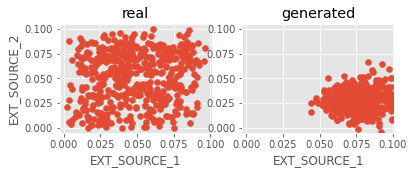

Step: 300 of 5001.
Losses: G, D Gen, D Real, Xgb: 0.6842, 0.7129, 0.6736, 0.9472
D Real - D Gen: -0.0393


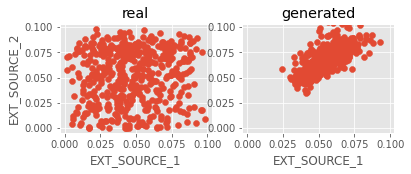

Step: 400 of 5001.
Losses: G, D Gen, D Real, Xgb: 0.7056, 0.7037, 0.6751, 0.9654
D Real - D Gen: -0.0287


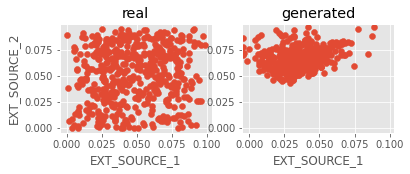

Step: 500 of 5001.
Losses: G, D Gen, D Real, Xgb: 0.7141, 0.6920, 0.6669, 0.9512
D Real - D Gen: -0.0251


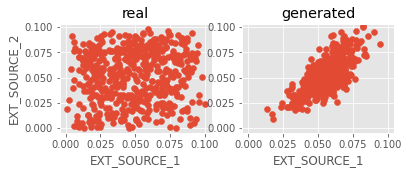

Step: 600 of 5001.
Losses: G, D Gen, D Real, Xgb: 0.7166, 0.6875, 0.6587, 0.9451
D Real - D Gen: -0.0289


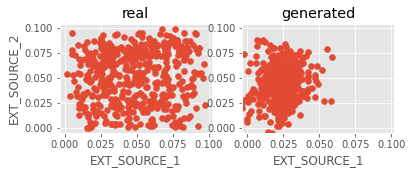

Step: 700 of 5001.
Losses: G, D Gen, D Real, Xgb: 0.7698, 0.6623, 0.6580, 0.9492
D Real - D Gen: -0.0044


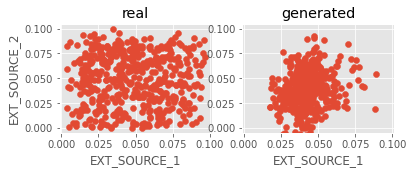

Step: 800 of 5001.
Losses: G, D Gen, D Real, Xgb: 0.7413, 0.6701, 0.6303, 0.9634
D Real - D Gen: -0.0398


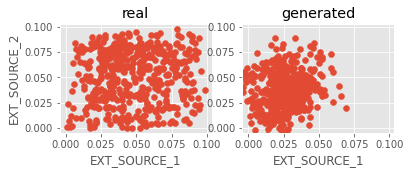

Step: 900 of 5001.
Losses: G, D Gen, D Real, Xgb: 0.7599, 0.6464, 0.6231, 0.9898
D Real - D Gen: -0.0233


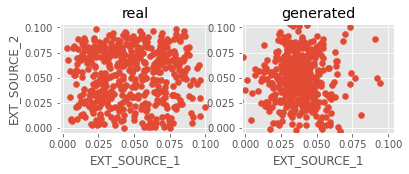

Step: 1000 of 5001.
Losses: G, D Gen, D Real, Xgb: 0.7749, 0.6354, 0.6422, 0.9167
D Real - D Gen: 0.0068


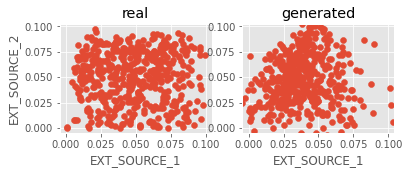

Step: 1100 of 5001.
Losses: G, D Gen, D Real, Xgb: 0.7794, 0.6274, 0.6875, 0.9980
D Real - D Gen: 0.0600


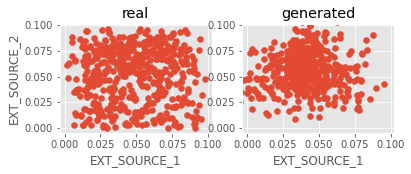

Step: 1200 of 5001.
Losses: G, D Gen, D Real, Xgb: 0.7730, 0.6365, 0.6197, 0.9533
D Real - D Gen: -0.0168


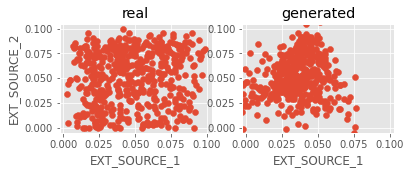

Step: 1300 of 5001.
Losses: G, D Gen, D Real, Xgb: 0.7672, 0.6452, 0.6251, 0.9919
D Real - D Gen: -0.0201


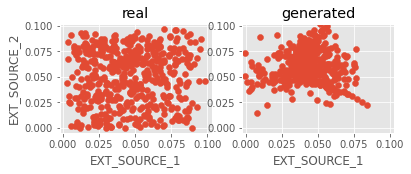

Step: 1400 of 5001.
Losses: G, D Gen, D Real, Xgb: 0.7754, 0.6358, 0.6574, 0.9512
D Real - D Gen: 0.0215


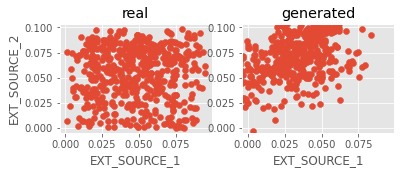

Step: 1500 of 5001.
Losses: G, D Gen, D Real, Xgb: 0.7871, 0.6381, 0.6661, 0.9837
D Real - D Gen: 0.0280


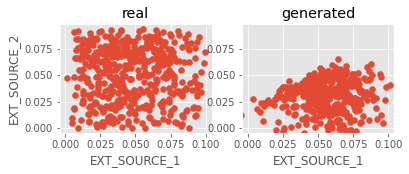

Step: 1600 of 5001.
Losses: G, D Gen, D Real, Xgb: 0.7761, 0.6410, 0.6983, 0.9980
D Real - D Gen: 0.0573


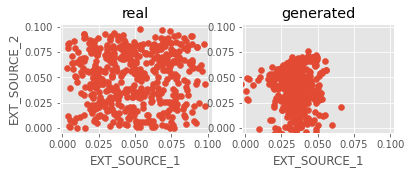

Step: 1700 of 5001.
Losses: G, D Gen, D Real, Xgb: 0.7899, 0.6217, 0.6914, 0.9919
D Real - D Gen: 0.0696


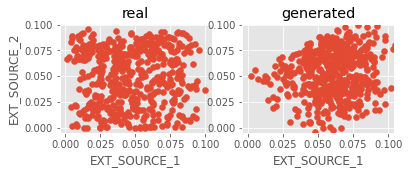

Step: 1800 of 5001.
Losses: G, D Gen, D Real, Xgb: 0.7283, 0.6830, 0.6312, 1.0000
D Real - D Gen: -0.0518


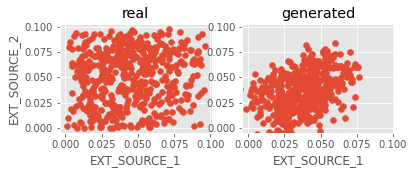

Step: 1900 of 5001.
Losses: G, D Gen, D Real, Xgb: 0.9164, 0.5620, 0.6795, 0.9472
D Real - D Gen: 0.1175


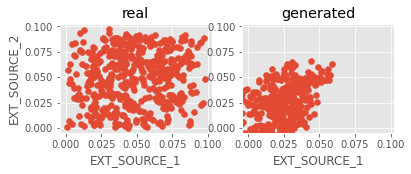

Step: 2000 of 5001.
Losses: G, D Gen, D Real, Xgb: 0.7538, 0.6439, 0.6824, 0.9817
D Real - D Gen: 0.0385


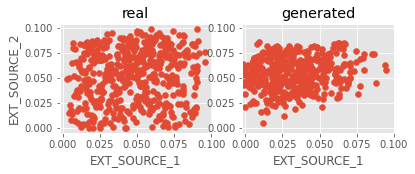

Step: 2100 of 5001.
Losses: G, D Gen, D Real, Xgb: 0.7713, 0.6294, 0.7226, 1.0000
D Real - D Gen: 0.0932


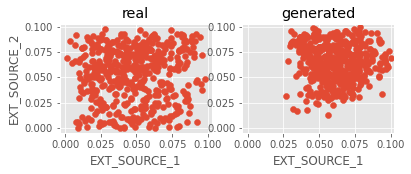

Step: 2200 of 5001.
Losses: G, D Gen, D Real, Xgb: 0.7902, 0.6313, 0.6241, 0.9512
D Real - D Gen: -0.0072


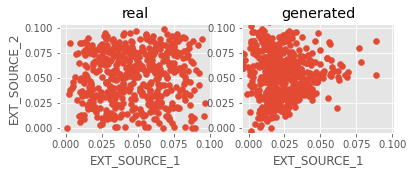

Step: 2300 of 5001.
Losses: G, D Gen, D Real, Xgb: 0.7794, 0.6275, 0.6599, 0.9756
D Real - D Gen: 0.0324


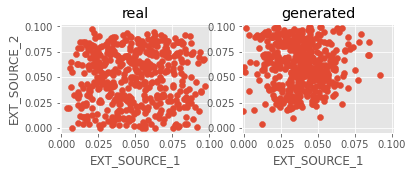

Step: 2400 of 5001.
Losses: G, D Gen, D Real, Xgb: 0.7649, 0.6424, 0.6574, 0.9939
D Real - D Gen: 0.0149


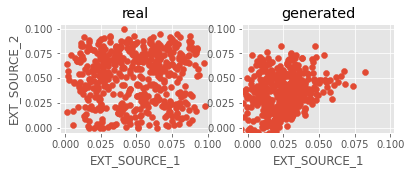

Step: 2500 of 5001.
Losses: G, D Gen, D Real, Xgb: 0.7748, 0.6301, 0.6446, 0.9878
D Real - D Gen: 0.0145


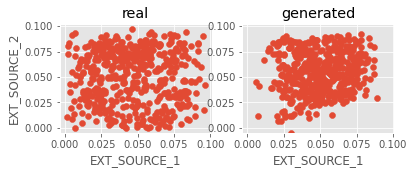

Step: 2600 of 5001.
Losses: G, D Gen, D Real, Xgb: 0.7520, 0.6489, 0.6831, 1.0000
D Real - D Gen: 0.0342


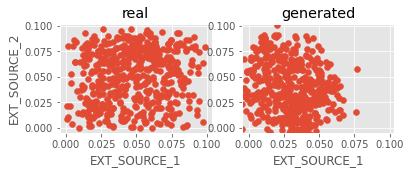

Step: 2700 of 5001.
Losses: G, D Gen, D Real, Xgb: 0.7781, 0.6241, 0.7221, 0.9431
D Real - D Gen: 0.0980


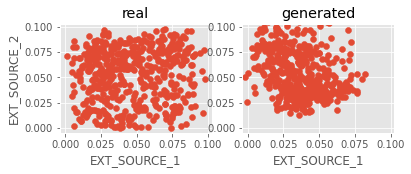

Step: 2800 of 5001.
Losses: G, D Gen, D Real, Xgb: 0.7625, 0.6335, 0.6614, 0.9898
D Real - D Gen: 0.0278


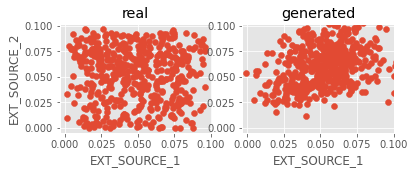

Step: 2900 of 5001.
Losses: G, D Gen, D Real, Xgb: 0.7904, 0.6226, 0.6737, 0.9593
D Real - D Gen: 0.0511


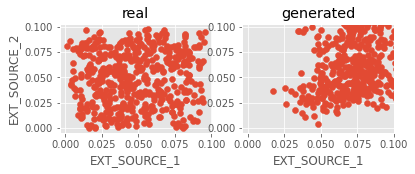

Step: 3000 of 5001.
Losses: G, D Gen, D Real, Xgb: 0.7714, 0.6304, 0.6911, 0.9614
D Real - D Gen: 0.0607


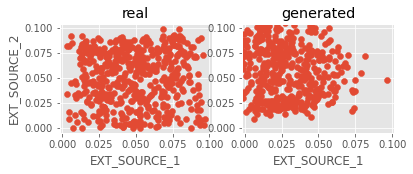

Step: 3100 of 5001.
Losses: G, D Gen, D Real, Xgb: 0.7585, 0.6364, 0.6345, 0.9512
D Real - D Gen: -0.0019


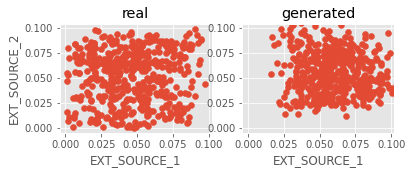

Step: 3200 of 5001.
Losses: G, D Gen, D Real, Xgb: 0.7846, 0.6208, 0.6437, 0.9228
D Real - D Gen: 0.0229


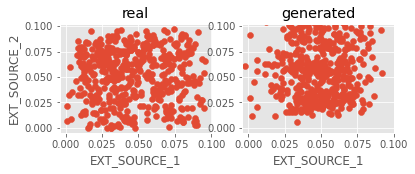

Step: 3300 of 5001.
Losses: G, D Gen, D Real, Xgb: 0.7765, 0.6220, 0.6847, 0.9858
D Real - D Gen: 0.0627


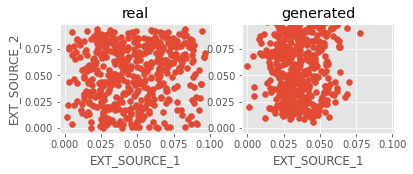

Step: 3400 of 5001.
Losses: G, D Gen, D Real, Xgb: 0.7778, 0.6239, 0.6621, 0.9451
D Real - D Gen: 0.0382


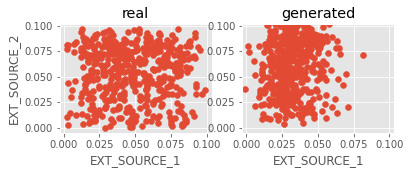

Step: 3500 of 5001.
Losses: G, D Gen, D Real, Xgb: 0.7600, 0.6347, 0.6851, 0.9268
D Real - D Gen: 0.0504


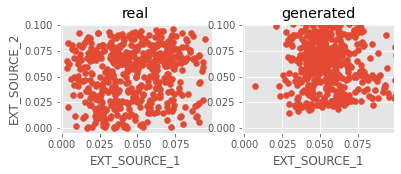

Step: 3600 of 5001.
Losses: G, D Gen, D Real, Xgb: 0.7707, 0.6288, 0.6806, 0.9675
D Real - D Gen: 0.0517


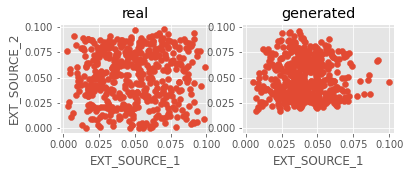

Step: 3700 of 5001.
Losses: G, D Gen, D Real, Xgb: 0.7615, 0.6318, 0.6950, 0.9553
D Real - D Gen: 0.0632


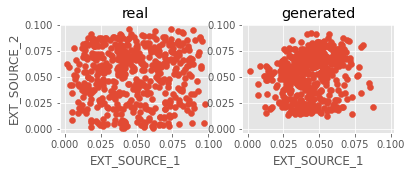

Step: 3800 of 5001.
Losses: G, D Gen, D Real, Xgb: 0.7755, 0.6308, 0.7089, 0.9472
D Real - D Gen: 0.0781


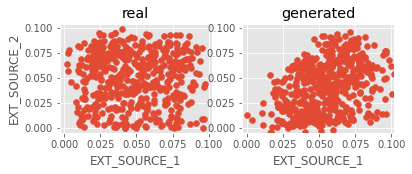

Step: 3900 of 5001.
Losses: G, D Gen, D Real, Xgb: 0.7534, 0.6421, 0.6359, 0.9492
D Real - D Gen: -0.0062


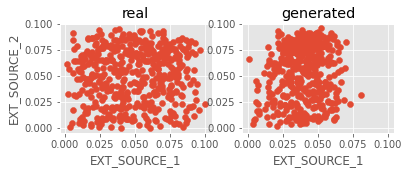

Step: 4000 of 5001.
Losses: G, D Gen, D Real, Xgb: 0.7659, 0.6323, 0.6665, 0.9268
D Real - D Gen: 0.0342


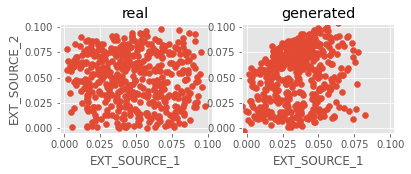

Step: 4100 of 5001.
Losses: G, D Gen, D Real, Xgb: 0.7606, 0.6349, 0.6641, 0.9065
D Real - D Gen: 0.0292


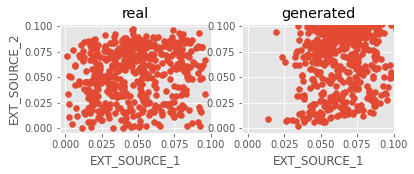

Step: 4200 of 5001.
Losses: G, D Gen, D Real, Xgb: 0.7620, 0.6333, 0.6719, 0.9350
D Real - D Gen: 0.0386


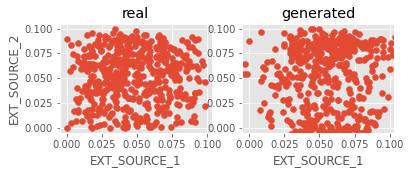

Step: 4300 of 5001.
Losses: G, D Gen, D Real, Xgb: 0.7740, 0.6376, 0.6609, 0.9736
D Real - D Gen: 0.0233


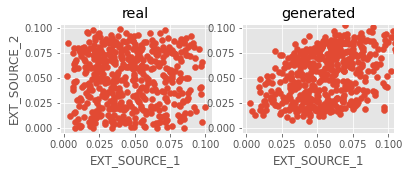

Step: 4400 of 5001.
Losses: G, D Gen, D Real, Xgb: 0.7641, 0.6301, 0.7145, 0.9472
D Real - D Gen: 0.0844


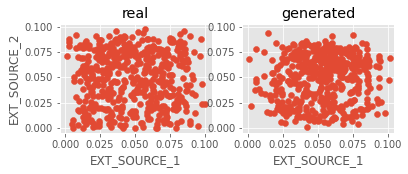

Step: 4500 of 5001.
Losses: G, D Gen, D Real, Xgb: 0.7652, 0.6288, 0.6274, 0.9024
D Real - D Gen: -0.0014


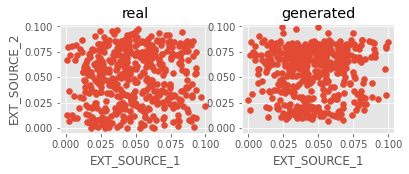

Step: 4600 of 5001.
Losses: G, D Gen, D Real, Xgb: 0.7639, 0.6359, 0.6773, 0.9776
D Real - D Gen: 0.0414


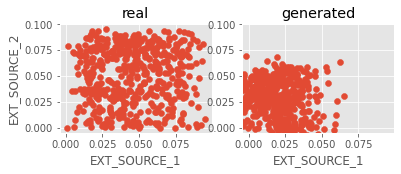

Step: 4700 of 5001.
Losses: G, D Gen, D Real, Xgb: 0.7595, 0.6353, 0.7184, 0.9350
D Real - D Gen: 0.0830


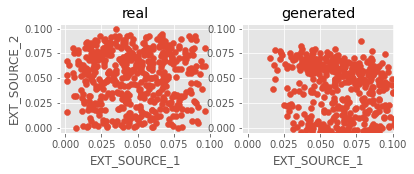

Step: 4800 of 5001.
Losses: G, D Gen, D Real, Xgb: 0.7607, 0.6424, 0.6587, 0.9024
D Real - D Gen: 0.0164


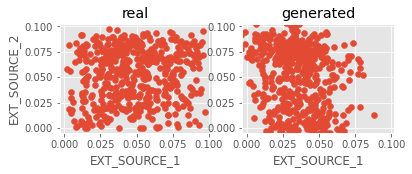

Step: 4900 of 5001.
Losses: G, D Gen, D Real, Xgb: 0.7582, 0.6340, 0.6689, 0.9207
D Real - D Gen: 0.0348


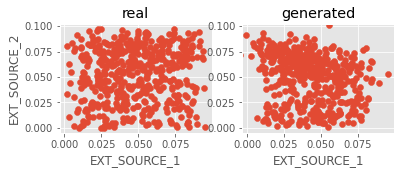

Step: 5000 of 5001.
Losses: G, D Gen, D Real, Xgb: 0.7593, 0.6372, 0.6897, 0.9390
D Real - D Gen: 0.0525


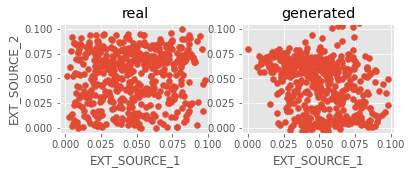

Wall time: 3min 53s


In [40]:
%%time

# Training the vanilla GAN architectures

k_d = 1  # number of critic network updates per adversarial training step
learning_rate = 5e-4 # 5e-5
arguments = [rand_dim, nb_steps, batch_size, 
             k_d, k_g, critic_pre_train_steps, log_interval, learning_rate, base_n_count,
            data_dir, generator_model_path, discriminator_model_path, loss_pickle_path, show ]

adversarial_training_GAN(arguments, train_no_label, data_cols ) # GAN

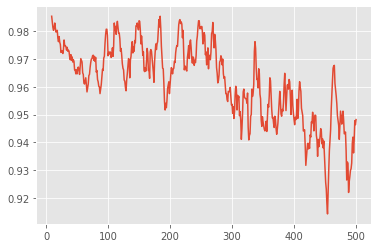

In [41]:
prefix = 'GAN'
step = 5000

[combined_loss, disc_loss_generated, disc_loss_real, xgb_losses] = pickle.load(
    open(data_dir+prefix+'_losses_step_'+str(step)+'.pkl','rb'))

w = 10
plt.plot( pd.DataFrame(xgb_losses[:]).rolling(w).mean() ) ;

In [48]:
generator_model

In [51]:
seed = 17
data_dim = len(data_cols)
label_dim = len(label_cols)
with_class = False
if label_dim > 0: with_class = True
np.random.seed(seed)

# define network models
generator_model, discriminator_model, combined_model = define_models_GAN(rand_dim, data_dim, base_n_count)
generator_model.load_weights('cache/GAN_generator_model_weights_step_5000.h5')

In [59]:
# Now generate some new data

test_size = 11908 # Equal to all of the fraud cases

x = get_data_batch(train, test_size, seed=17)
z = np.random.normal(size=(test_size, rand_dim))
if with_class:
    labels = x[:,-label_dim:]
    g_z = generator_model.predict([z, labels])
else:
    g_z = generator_model.predict(z)

0.960530735639906


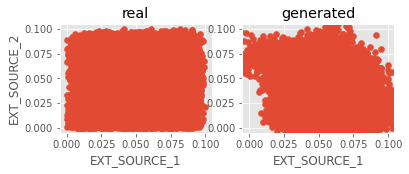

In [60]:
# Check using the same functions used during GAN training

print( CheckAccuracy( x, g_z, data_cols, label_cols, seed=0, with_class=with_class, data_dim=data_dim ) )

PlotData( x, g_z, data_cols, label_cols, seed=0, with_class=with_class, data_dim=data_dim )

In [67]:
# Generate lager scale of data, and output
z = np.random.normal(size=(300000, rand_dim))
if with_class:
    labels = x[:,-label_dim:]
    g_z = generator_model.predict([z, labels])
else:
    g_z = generator_model.predict(z)

g_z = g_z*10
GAN_generated = pd.DataFrame(g_z, columns=data_cols)
GAN_generated.to_csv("GAN_generated.csv")

## Result output

**Re-feature engineering:** Work with the test data, the same as the train data

In [36]:
encoded_test = encoder.transform(test[nominal_features].fillna(method='ffill').fillna(method='bfill')).toarray()
# Create a new dataframe, data is one-hot array
encoded_test = pd.DataFrame(encoded_test)

# Give the new df column names
encoded_test.columns = list(encoder.get_feature_names())

D:\Python\anaconda\envs\tf2.0\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


repeat feature engineering process on final test set

In [ ]:
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(strategy = 'median')
adjust_test = imputer.fit_transform(pd.concat([encoded_test, test[numerical_feature], axis=1 ))

In [37]:
# adjust_test = pd.concat([encoded_test, test[numerical_feature].fillna(method='ffill').fillna(method='bfill')], axis=1)

adjust_test = pd.merge(adjust_test, CREDIT_ACTIVE_count, how='left', on='SK_ID_CURR')
adjust_test = adjust_test.fillna(method='ffill').fillna(method='bfill')

adjust_test['AMT_CREDIT'] = adjust_test['AMT_CREDIT'].apply(np.log)
adjust_test['AMT_GOODS_PRICE'] = adjust_test['AMT_GOODS_PRICE'].apply(np.log)
adjust_test['AMT_ANNUITY'] = adjust_test['AMT_ANNUITY'].apply(np.log)

adjust_test['ANNUITY_CREDIT_ratio'] = adjust_test['AMT_ANNUITY']/adjust_test['AMT_CREDIT']

In [51]:
X.shape

(307511, 250)

Re-fit the model with all the train data and predict the test data

In [58]:
d_adjust_train = xgb.DMatrix(X[reduced_feature], y, feature_names=reduced_feature)
d_adjust_test = xgb.DMatrix(adjust_test[reduced_feature], feature_names=reduced_feature)

In [39]:
xgb_cv = xgb.cv(xgb_params, d_adjust_train, num_boost_round=500, 
                verbose_eval=False,
                early_stopping_rounds=50,
                nfold=5,
                show_stdv=True,
                metrics='auc', 
                maximize=True)
xgb_cv

,train-auc-mean,train-auc-std,test-auc-mean,test-auc-std
0,0.695290,0.001435,0.692252,0.003393
1,0.702798,0.001253,0.699160,0.004006
2,0.705967,0.001837,0.702270,0.002895
3,0.710319,0.001875,0.705946,0.005466
4,0.712208,0.002335,0.707533,0.006048
...,...,...,...,...
294,0.796410,0.000957,0.752138,0.003397
295,0.796549,0.000963,0.752145,0.003381
296,0.796715,0.000953,0.752181,0.003338
297,0.796842,0.000981,0.752187,0.003339


In [64]:
XGB = xgb.train(xgb_params,d_adjust_train,num_boost_round=100)

In [65]:
# use the fitted model to predict the result
test_predict = XGB.predict(d_adjust_test)
test_predict = [round(value) for value in test_predict]

In [66]:
result = pd.DataFrame({'SK_ID_CURR':test['SK_ID_CURR'], 'TARGET':test_predict})
result.to_csv('./output.csv',index=False,sep=',')

In [67]:
result[result["TARGET"]==1]

,SK_ID_CURR,TARGET
40,100311,1.0
48,100384,1.0
59,100446,1.0
73,100561,1.0
74,100568,1.0
...,...,...
48664,455536,1.0
48668,455567,1.0
48671,455636,1.0
48700,455854,1.0
